In [181]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [182]:
df = pd.read_csv('../data/smoking_dataset.csv')
print(df.head())
print(df.info())

        Country  Year  Total Smokers (Millions)  Smoking Prevalence (%)  \
0  South Africa  2010                     279.6                    21.5   
1  South Africa  2022                      41.8                    10.2   
2  South Africa  2017                     262.0                    30.7   
3       Germany  2016                      11.3                    38.2   
4        Brazil  2014                     241.9                    27.6   

   Male Smokers (%)  Female Smokers (%)  \
0              13.3                 8.2   
1               7.5                 2.7   
2              22.1                 8.6   
3              24.1                14.1   
4              18.2                 9.4   

   Cigarette Consumption (Billion Units) Top Cigarette Brand in Country  \
0                                 2415.7               Peter Stuyvesant   
1                                   97.0               Peter Stuyvesant   
2                                  161.5               Peter Stuy

In [183]:
df["Smoking Ban Policy"] = df.groupby("Country")["Smoking Ban Policy"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [184]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Country                                  0
Year                                     0
Total Smokers (Millions)                 0
Smoking Prevalence (%)                   0
Male Smokers (%)                         0
Female Smokers (%)                       0
Cigarette Consumption (Billion Units)    0
Top Cigarette Brand in Country           0
Brand Market Share (%)                   0
Smoking-Related Deaths                   0
Tobacco Tax Rate (%)                     0
Smoking Ban Policy                       0
dtype: int64


In [185]:
#the global total number of smokers in the year 2024.
total_smokers_2024 = df[df["Year"] == 2024]["Total Smokers (Millions)"].sum()
print(f"Total Smokers in 2024: {total_smokers_2024:.1f} million")

Total Smokers in 2024: 2791.5 million


In [186]:
#the average smoking prevalence percentage for each country.
prevalence_by_country = df.groupby("Country")["Smoking Prevalence (%)"].mean()
print(prevalence_by_country.head())

Country
Australia    22.787500
Brazil       23.366667
Canada       20.350000
China        22.645455
France       19.525000
Name: Smoking Prevalence (%), dtype: float64


In [187]:
#the average tobacco tax rate by year.
avg_tax_by_year = df.groupby("Year")["Tobacco Tax Rate (%)"].mean()
print(avg_tax_by_year.head())

Year
2010    38.900000
2011    63.316667
2012    55.290909
2013    54.600000
2014    67.421429
Name: Tobacco Tax Rate (%), dtype: float64


In [188]:
#total cigarette consumption in billions per country.
total_consumption_by_country = df.groupby("Country")["Cigarette Consumption (Billion Units)"].sum()
print(total_consumption_by_country.head())

Country
Australia    7044.2
Brazil       7607.0
Canada       5123.0
China        9590.6
France       2686.1
Name: Cigarette Consumption (Billion Units), dtype: float64


In [189]:
#the top 5 countries with the highest number of deaths linked to smoking.
top_deaths = df.groupby("Country")["Smoking-Related Deaths"].sum().nlargest(10)
print(top_deaths)

Country
India           3122988
South Africa    2693035
Indonesia       2506181
Turkey          2343073
China           2290169
Russia          1998464
Brazil          1977591
Australia       1723915
Italy           1697894
Spain           1645229
Name: Smoking-Related Deaths, dtype: int64


In [190]:
#how smoking bans correlate with average prevalence rates.
ban_vs_prevalence = df.groupby("Smoking Ban Policy")["Smoking Prevalence (%)"].mean()
print(ban_vs_prevalence)

Smoking Ban Policy
Comprehensive    24.216667
Partial          22.735714
Name: Smoking Prevalence (%), dtype: float64


In [191]:
#how many countries have adopted a 'Comprehensive' smoking ban.
comprehensive_ban = len(df[df["Smoking Ban Policy"] == "Comprehensive"])
print(f"Countries with Comprehensive Ban: {comprehensive_ban}")

Countries with Comprehensive Ban: 66


In [192]:
#average market share of top cigarette brands per country.
brand_share_dist = df.groupby("Top Cigarette Brand in Country")["Brand Market Share (%)"].mean()
print(brand_share_dist.head())

Top Cigarette Brand in Country
China National Tobacco Corp.    30.345455
Derby                           32.066667
Du Maurier                      39.233333
Esse                            34.444444
Fortuna                         42.528571
Name: Brand Market Share (%), dtype: float64


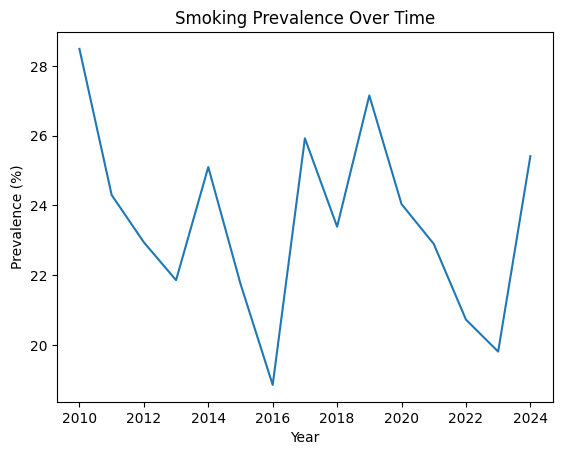

In [193]:
df.groupby("Year")["Smoking Prevalence (%)"].mean().plot(kind="line")
plt.title("Smoking Prevalence Over Time")
plt.ylabel("Prevalence (%)")
plt.show()

In [194]:
#the average percentage of male and female smokers in each country.
gender_smokers_by_country = df.groupby("Country")[["Male Smokers (%)", "Female Smokers (%)"]].mean()
print(gender_smokers_by_country.head())

           Male Smokers (%)  Female Smokers (%)
Country                                        
Australia         18.162500            4.625000
Brazil            18.944444            4.422222
Canada            16.416667            3.933333
China             17.245455            5.400000
France            15.650000            3.875000


In [195]:
#Percentage of Countries with Tobacco Tax Over 50%
high_tax = len(df[df["Tobacco Tax Rate (%)"] > 50]) / len(df) * 100
print(f"Percentage with Tax > 50%: {high_tax:.2f}%")

Percentage with Tax > 50%: 54.00%


In [196]:
#how brand market share correlates with average cigarette consumption.
share_vs_consumption = df.groupby("Brand Market Share (%)")["Cigarette Consumption (Billion Units)"].mean()
print(share_vs_consumption.head())

Brand Market Share (%)
10.1     171.6
10.7     719.4
10.9     677.9
11.2     517.0
11.3    1213.3
Name: Cigarette Consumption (Billion Units), dtype: float64


In [197]:
#average deaths related to smoking for each ban policy type.
deaths_by_ban = df.groupby("Smoking Ban Policy")["Smoking-Related Deaths"].mean()
print(deaths_by_ban)

Smoking Ban Policy
Comprehensive    254125.909091
Partial          201079.511905
Name: Smoking-Related Deaths, dtype: float64


In [198]:
#Groups countries based on smoking prevalence bins and counts how many fall into each range.
prevalence_bins = pd.cut(df["Smoking Prevalence (%)"], bins=[0, 20, 40, 60], include_lowest=True)
prev_dist = df.groupby(prevalence_bins, observed=True)["Country"].count()
print("Distribution of Countries by Smoking Prevalence Bins:")
print(prev_dist)

Distribution of Countries by Smoking Prevalence Bins:
Smoking Prevalence (%)
(-0.001, 20.0]    57
(20.0, 40.0]      93
Name: Country, dtype: int64


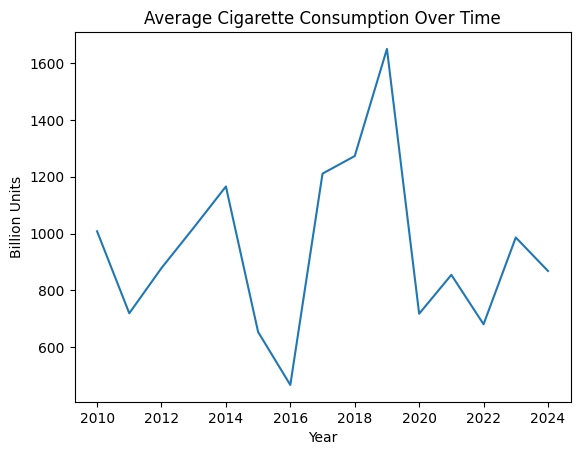

In [199]:
df.groupby("Year")["Cigarette Consumption (Billion Units)"].mean().plot(kind="line")
plt.title("Average Cigarette Consumption Over Time")
plt.ylabel("Billion Units")
plt.show()

In [200]:
#how smoking prevalence changes with varying tax rates.
tax_vs_prevalence = df.groupby("Tobacco Tax Rate (%)")["Smoking Prevalence (%)"].mean()
print(tax_vs_prevalence.head())

Tobacco Tax Rate (%)
30.1     8.6
30.4    38.2
30.7    28.6
31.5    10.5
32.3    22.3
Name: Smoking Prevalence (%), dtype: float64


In [201]:
#the total number of smokers per leading cigarette brand in each country.
total_smokers_by_brand = df.groupby("Top Cigarette Brand in Country")["Total Smokers (Millions)"].sum()
print(total_smokers_by_brand.head())

Top Cigarette Brand in Country
China National Tobacco Corp.    1710.9
Derby                           1511.8
Du Maurier                       883.5
Esse                            1317.2
Fortuna                         1319.2
Name: Total Smokers (Millions), dtype: float64


In [202]:
#the 10 countries with the lowest recorded smoking prevalence rates.
top_decline = (df.loc[df.groupby("Country")["Smoking Prevalence (%)"].idxmin()]
                .set_index("Country")["Smoking Prevalence (%)"]
                .nlargest(10))
print(top_decline)

Country
Germany        23.9
Japan          22.1
Russia         19.4
Italy          17.2
France         12.6
Australia      12.3
South Korea    11.9
Mexico         11.1
Brazil         10.8
Turkey         10.6
Name: Smoking Prevalence (%), dtype: float64


In [203]:
#how many times each country implemented each type of smoking ban policy.
ban_by_country = df.groupby("Country")["Smoking Ban Policy"].value_counts()
print(ban_by_country.head())

Country    Smoking Ban Policy
Australia  Partial               7
           Comprehensive         1
Brazil     Comprehensive         7
           Partial               2
Canada     Partial               6
Name: count, dtype: int64


In [204]:
#the average market share for each cigarette brand across countries.
brand_share_by_brand = df.groupby("Top Cigarette Brand in Country")["Brand Market Share (%)"].mean()
print(brand_share_by_brand.head())

Top Cigarette Brand in Country
China National Tobacco Corp.    30.345455
Derby                           32.066667
Du Maurier                      39.233333
Esse                            34.444444
Fortuna                         42.528571
Name: Brand Market Share (%), dtype: float64


In [205]:
#average smoking rates between males and females in the year 2024.
gender_vs_prev_2024 = df[df["Year"] == 2024][["Male Smokers (%)", "Female Smokers (%)"]].mean()
print(gender_vs_prev_2024)

Male Smokers (%)      19.600000
Female Smokers (%)     5.811765
dtype: float64


In [206]:
#the number of countries where smoking-related deaths exceed 100,000.
high_deaths = len(df[df["Smoking-Related Deaths"] > 100000])
print(f"Countries with >100,000 Deaths: {high_deaths}")

Countries with >100,000 Deaths: 105


In [207]:
#the percentage of countries that have both high taxes (>50%) and a comprehensive smoking ban.
high_tax_ban = len(df[(df["Smoking Ban Policy"] == "Comprehensive") & (df["Tobacco Tax Rate (%)"] > 50)]) / len(df) * 100
print(f"Percentage with High Tax & Comprehensive Ban: {high_tax_ban:.2f}%")

Percentage with High Tax & Comprehensive Ban: 19.33%


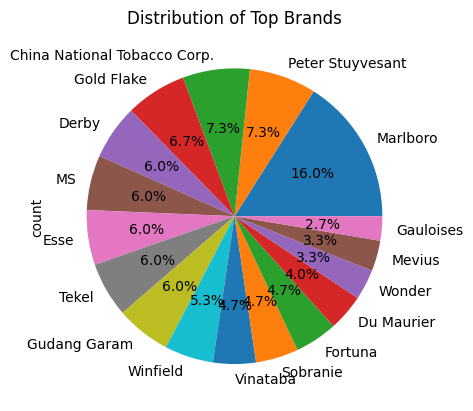

In [208]:
df["Top Cigarette Brand in Country"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Top Brands")
plt.show()

In [209]:
#Displays the average cigarette consumption in each country.
consumption_by_country = df.groupby("Country")["Cigarette Consumption (Billion Units)"].mean()
print(consumption_by_country.head())

Country
Australia    880.525000
Brazil       845.222222
Canada       853.833333
China        871.872727
France       671.525000
Name: Cigarette Consumption (Billion Units), dtype: float64


In [210]:
#the average number of smoking-related deaths in 2022 by type of smoking ban.
ban_vs_deaths_2022 = df[df["Year"] == 2022].groupby("Smoking Ban Policy")["Smoking-Related Deaths"].mean()
print(ban_vs_deaths_2022)

Smoking Ban Policy
Comprehensive    227635.875
Partial          256407.875
Name: Smoking-Related Deaths, dtype: float64


In [211]:
#the top 10 countries that experienced the largest drop in the number of smokers.
top_smoker_decline = (
    df.loc[df.groupby("Country")["Total Smokers (Millions)"].idxmin()]
    .sort_values("Total Smokers (Millions)").head(10))

print("Top 10 Countries by Lowest Number of Smokers Recorded:")
print(top_smoker_decline[["Country", "Total Smokers (Millions)", "Year"]].to_string(index=False))

Top 10 Countries by Lowest Number of Smokers Recorded:
    Country  Total Smokers (Millions)  Year
     Canada                       2.7  2015
South Korea                       4.1  2024
    Vietnam                       4.8  2020
     France                       5.0  2020
  Australia                       7.9  2018
    Germany                      11.3  2016
      Italy                      11.5  2012
      China                      13.2  2010
     Turkey                      14.8  2020
        USA                      21.7  2022


In [212]:
#Total Market Share per Year
total_share_by_year = df.groupby("Year")["Brand Market Share (%)"].sum()
print(total_share_by_year)

Year
2010    216.4
2011    183.4
2012    386.1
2013    201.7
2014    438.4
2015    281.2
2016    116.7
2017    472.3
2018    379.5
2019    104.3
2020    402.0
2021    352.4
2022    572.4
2023    478.0
2024    508.7
Name: Brand Market Share (%), dtype: float64


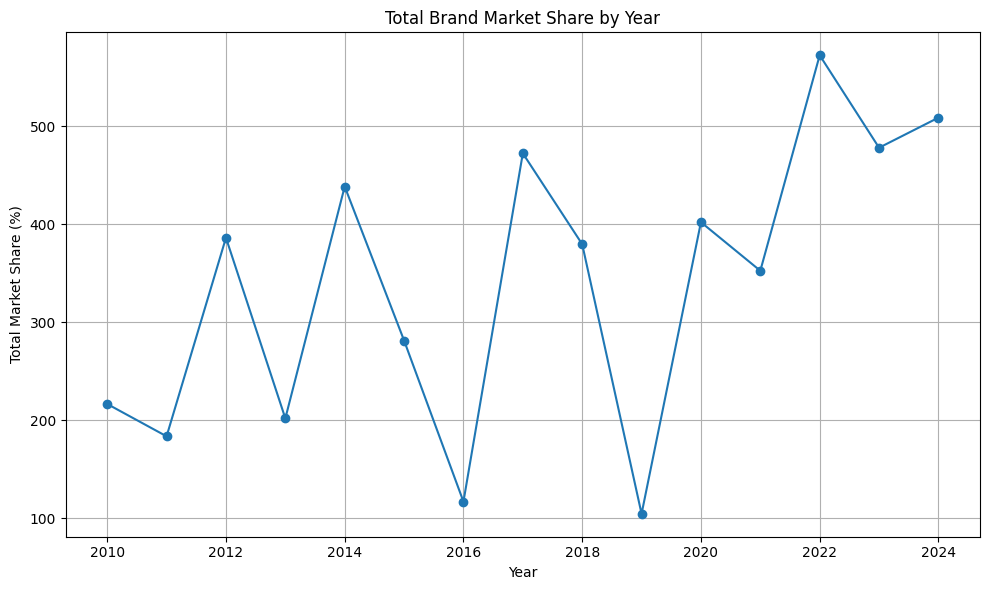

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(total_share_by_year.index, total_share_by_year.values, marker='o', linestyle='-')
plt.title("Total Brand Market Share by Year")
plt.xlabel("Year")
plt.ylabel("Total Market Share (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

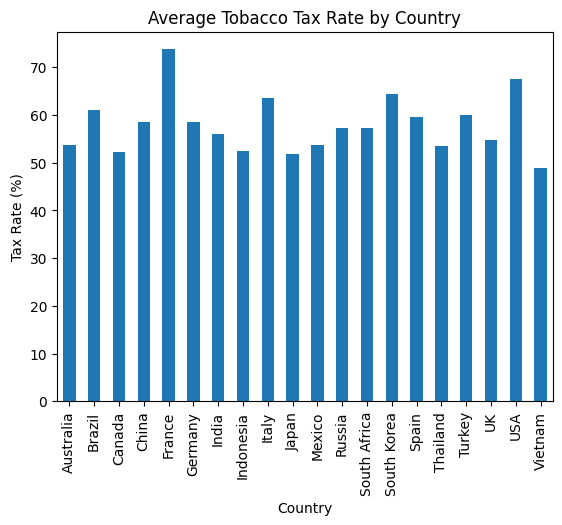

In [214]:
df.groupby("Country")["Tobacco Tax Rate (%)"].mean().plot(kind="bar")
plt.title("Average Tobacco Tax Rate by Country")
plt.ylabel("Tax Rate (%)")
plt.show()

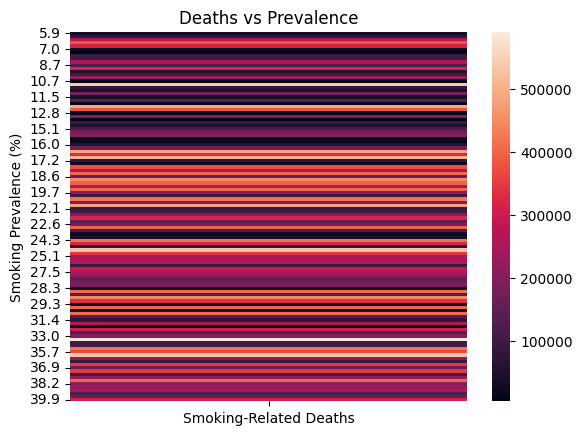

In [215]:
pivot = df.pivot_table(values="Smoking-Related Deaths", index="Smoking Prevalence (%)", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Deaths vs Prevalence")
plt.show()

In [216]:
# Predict the smoking prevalence for the year 2025

df_yearly = df.groupby("Year")["Smoking Prevalence (%)"].mean().reset_index()

#Prepare the feature (year) and target (prevalence) variables
X = df_yearly["Year"].values.reshape(-1, 1)
y = df_yearly["Smoking Prevalence (%)"].values

# بناء نموذج الانحدار
model = LinearRegression()
model.fit(X, y)

#Predict the smoking prevalence for the year 2025
year_2025 = np.array([[2025]])
prediction_2025 = model.predict(year_2025)[0]
print(f"Predicted Smoking Prevalence in 2025: {prediction_2025:.2f}%")

Predicted Smoking Prevalence in 2025: 22.28%


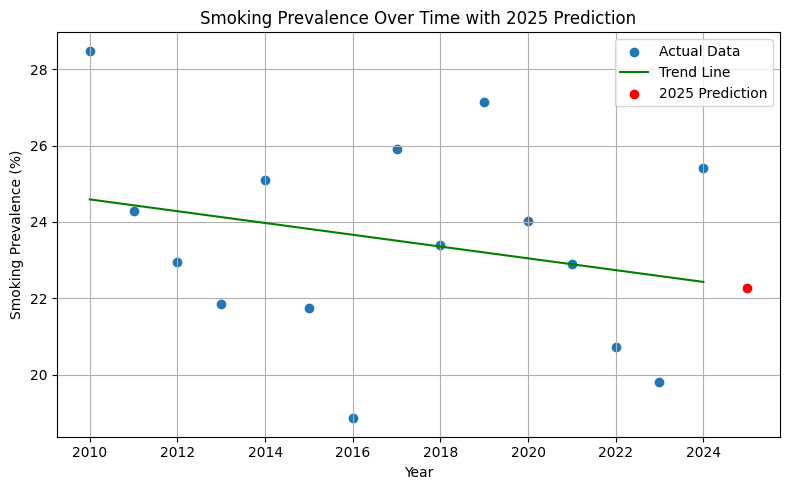

In [217]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), color="green", label="Trend Line")
plt.scatter(2025, prediction_2025, color="red", label="2025 Prediction")
plt.title("Smoking Prevalence Over Time with 2025 Prediction")
plt.xlabel("Year")
plt.ylabel("Smoking Prevalence (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
